**Install**

In [12]:
!pip install torchvision

**Imports & Setup**

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

**Define the Model (cc-3-128)**

In [14]:
class CC3128Net(nn.Module):
    def __init__(self):
        super(CC3128Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x)))  # 14x14 -> 7x7
        x = self.pool(F.relu(self.conv3(x)))  # 7x7 -> 3x3
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

**Data Preparation**

In [15]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_len = int(0.9 * len(train_dataset))
val_len = len(train_dataset) - train_len
train_data, val_data = random_split(train_dataset, [train_len, val_len])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

**Initialize Model, Loss & Optimizer**

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CC3128Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Training Loop**

In [18]:
epochs = 20
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch 1/20, Loss: 0.2722, Val Accuracy: 0.9048
Epoch 2/20, Loss: 0.2236, Val Accuracy: 0.9052
Epoch 3/20, Loss: 0.1937, Val Accuracy: 0.9168
Epoch 4/20, Loss: 0.1692, Val Accuracy: 0.9225
Epoch 5/20, Loss: 0.1487, Val Accuracy: 0.9248
Epoch 6/20, Loss: 0.1285, Val Accuracy: 0.9208
Epoch 7/20, Loss: 0.1082, Val Accuracy: 0.9243
Epoch 8/20, Loss: 0.0942, Val Accuracy: 0.9242
Epoch 9/20, Loss: 0.0794, Val Accuracy: 0.9235
Epoch 10/20, Loss: 0.0680, Val Accuracy: 0.9212
Epoch 11/20, Loss: 0.0619, Val Accuracy: 0.9233
Epoch 12/20, Loss: 0.0554, Val Accuracy: 0.9222
Epoch 13/20, Loss: 0.0526, Val Accuracy: 0.9217
Epoch 14/20, Loss: 0.0409, Val Accuracy: 0.9222
Epoch 15/20, Loss: 0.0429, Val Accuracy: 0.9260
Epoch 16/20, Loss: 0.0415, Val Accuracy: 0.9248
Epoch 17/20, Loss: 0.0333, Val Accuracy: 0.9190
Epoch 18/20, Loss: 0.0340, Val Accuracy: 0.9218
Epoch 19/20, Loss: 0.0305, Val Accuracy: 0.9237
Epoch 20/20, Loss: 0.0320, Val Accuracy: 0.9205


In [19]:
# Test Accuracy Calculation
correct_test = 0
total_test = 0

# Set model to evaluation mode for inference
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 91.60%


**Plot Loss & Accuracy**

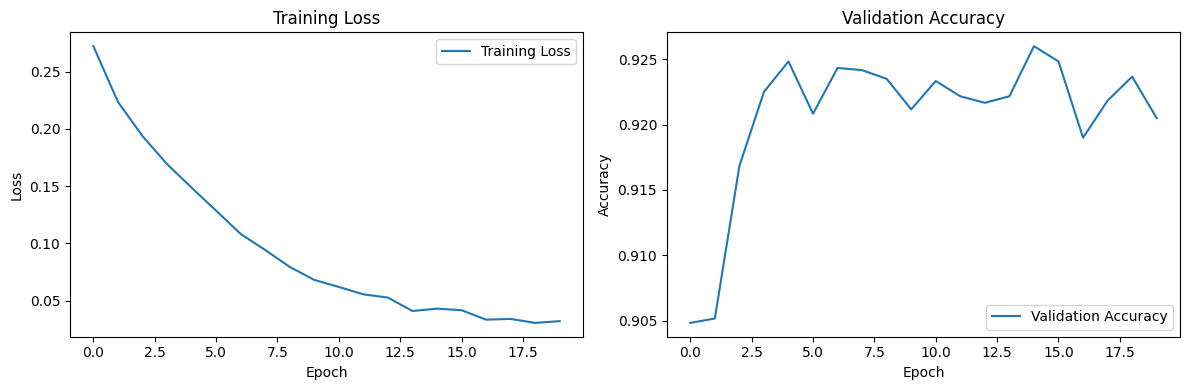

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

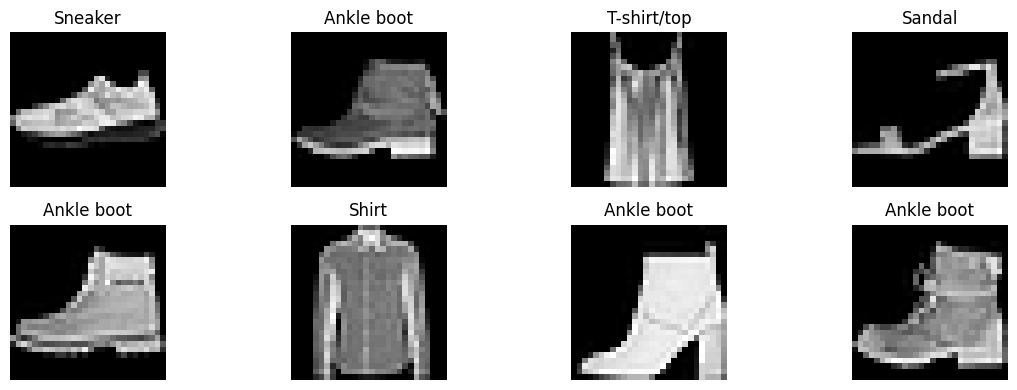

In [21]:
import torchvision
import torchvision.transforms as transforms

# Class labels for FashionMNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get a batch from the DataLoader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot the first 8 images in the batch
plt.figure(figsize=(12, 4))
for idx in range(8):
    plt.subplot(2, 4, idx+1)
    plt.imshow(images[idx].squeeze(), cmap='gray')  # squeeze to remove channel dim
    plt.title(classes[labels[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()

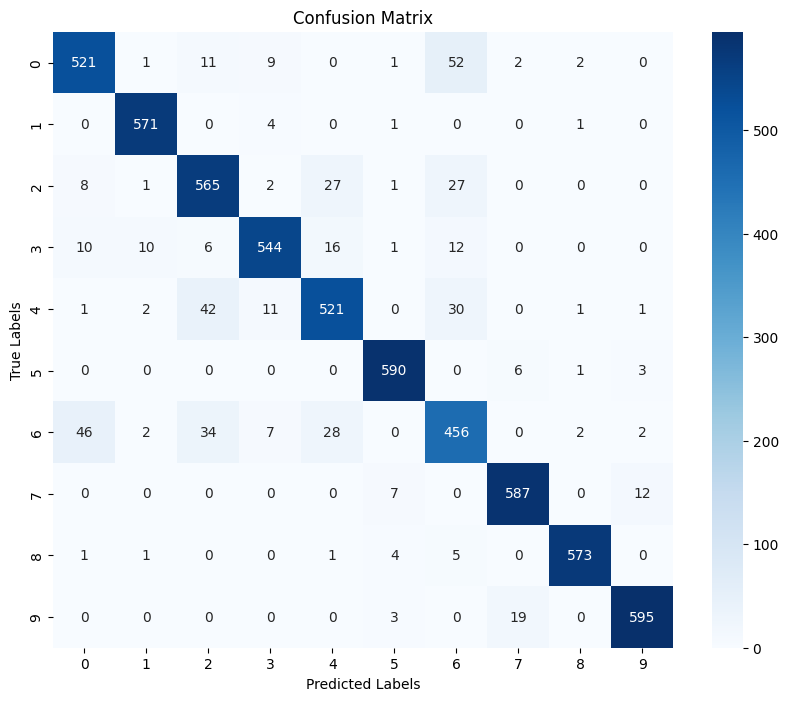

In [22]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, data_loader, device, classes):
    model.eval()  # Set model to evaluation mode

    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get predicted class labels

            all_labels.extend(labels.cpu().numpy())  # Append true labels
            all_predictions.extend(predicted.cpu().numpy())  # Append predicted labels

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have a model, data loader (val_loader), and device setup
classes = [str(i) for i in range(10)]  # Modify this for your specific dataset's classes, e.g., FashionMNIST has 10 classes
plot_confusion_matrix(model, val_loader, device, classes)